In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import load_windgps_data_to_pandas

In [3]:
import process_windgps_functions

In [4]:
# where your binary data files are
data_directory = 'large_sample_data'

# data column names and corresponding types based on the struct_t in the teensy firmware
# see: https://numpy.org/devdocs/user/basics.types.html
data_type = [('millis', '<u4'),  # uint32_t time;
             ('lat', np.single), # uint32_t test1;
             ('lon', np.single),
             ('gps_time', '<u4'),
             ('gps_date', '<u4'),
             ('wind', 'S128')] # char test2[24];

# how many fill bytes are there? from teensy code.
# would be nice if this could be determined automatically...
# probably can be done given size of the file, size of the header, size of the buffer from the datatype
number_fill_bytes = 90  # guess
number_data_records = 5 # guess

In [5]:
filenames = load_windgps_data_to_pandas.get_filenames(data_directory, '.bin')

In [6]:
discover = load_windgps_data_to_pandas.discover_number_of_fill_bytes_and_data_records
number_data_records, number_fill_bytes = discover( filenames[0], data_type, 
                                                   number_data_records, number_fill_bytes,
                                                   verbose = False)

In [7]:
df = load_windgps_data_to_pandas.load_data_from_directory(data_directory, data_type, 
                                                                 number_data_records, number_fill_bytes)

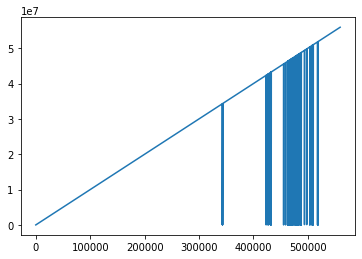

In [8]:
plt.plot(df.millis)

In [12]:
df2 = process_windgps_functions.fix_millis_time(df)

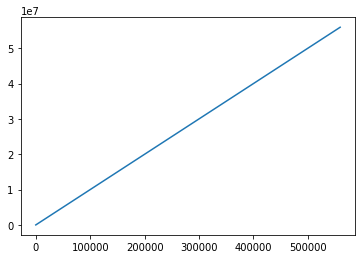

In [13]:
plt.plot(df2.millis)